4 stock EDA

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
df = pdr.get_data_yahoo(["NFLX"], start="2022-12-20", end="2022-12-27")
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-20  281.239990  289.279999  280.809998  288.190002  288.190002   
2022-12-21  289.989990  300.660004  286.500000  297.959991  297.959991   
2022-12-22  298.089996  298.880005  290.809998  297.750000  297.750000   
2022-12-23  296.179993  298.459991  291.910004  294.959991  294.959991   

             Volume  
Date                 
2022-12-20  6918100  
2022-12-21  6376200  
2022-12-22  7856200  
2022-12-23  4251100  


In [ ]:
df.describe()

Open        High         Low       Close   Adj Close  \
count    4.000000    4.000000    4.000000    4.000000    4.000000   
mean   291.374992  296.820000  287.507500  294.714996  294.714996   
std      7.589813    5.116328    5.038522    4.559854    4.559854   
min    281.239990  289.279999  280.809998  288.190002  288.190002   
25%    287.802490  296.164993  285.077499  293.267494  293.267494   
50%    293.084991  298.669998  288.654999  296.354996  296.354996   
75%    296.657494  299.325005  291.084999  297.802498  297.802498   
max    298.089996  300.660004  291.910004  297.959991  297.959991   

             Volume  
count  4.000000e+00  
mean   6.350400e+06  
std    1.527246e+06  
min    4.251100e+06  
25%    5.844925e+06  
50%    6.647150e+06  
75%    7.152625e+06  
max    7.856200e+06

In [ ]:
test = df['Adj Close']
test.head()


Date
2022-12-20    288.190002
2022-12-21    297.959991
2022-12-22    297.750000
2022-12-23    294.959991
Name: Adj Close, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

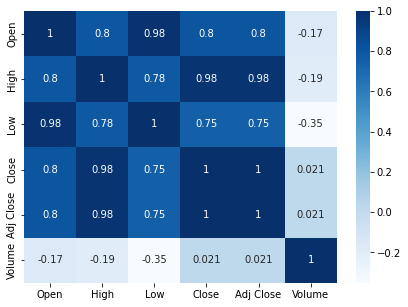

In [ ]:
#NFLX
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-20  281.239990  289.279999  280.809998  288.190002  288.190002   
2022-12-21  289.989990  300.660004  286.500000  297.959991  297.959991   
2022-12-22  298.089996  298.880005  290.809998  297.750000  297.750000   
2022-12-23  296.179993  298.459991  291.910004  294.959991  294.959991   

             Volume  open-high  open-low  close-high  close-low   high-low  \
Date                                                                         
2022-12-20  6918100  -8.040009  0.429993   -1.089996   7.380005   8.470001   
2022-12-21  6376200 -10.670013  3.489990   -2.700012  11.459991  14.160004   
2022-12-22  7856200  -0.790009  7.279999   -1.130005   6.940002   8.070007   
2022-12-23  4251100  -2.279999  4.269989   -3.500000   3.049988   6.549988   

            open-close  
Date                    
2022-12-20   -6.950012  
2022-12-21   -7.970001  
2022-12-22    0.339996  
2022-12-23    1.220001

In [ ]:
data2 = df.copy()
data2 = data2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

<AxesSubplot:>

In [ ]:
sns.barplot(data=data2, x = "open-high", y="Volume")


<AxesSubplot:xlabel='open-high', ylabel='Volume'>

<AxesSubplot:xlabel='high-low', ylabel='Volume'>

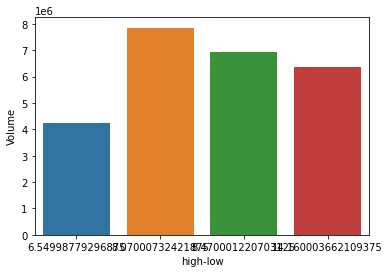

In [ ]:
sns.barplot(data=data2, x = "high-low", y="Volume")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2022-12-20 to 2022-12-23
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4 non-null      float64
 1   High        4 non-null      float64
 2   Low         4 non-null      float64
 3   Close       4 non-null      float64
 4   Adj Close   4 non-null      float64
 5   Volume      4 non-null      int64  
 6   open-high   4 non-null      float64
 7   open-low    4 non-null      float64
 8   close-high  4 non-null      float64
 9   close-low   4 non-null      float64
 10  high-low    4 non-null      float64
 11  open-close  4 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 416.0 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style(‘whitegrid’)
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime

In [ ]:
tech_list = ['AAPL','GOOGL','MSFT','NVDA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for getting the stock data
for stock in tech_list:
  globals()[stock] = DataReader(stock, start, end)

NotImplementedError: ignored

In [ ]:
company_list = ['AAPL', 'GOOG', 'MSFT', 'NVDA']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'NVIDA']

for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.sample(10)

TypeError: ignored

In [ ]:
AAPL.describe()

In [ ]:
AAPL.info()



In [ ]:
# Adj.Closing

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f'{tech_list[i - 1]}')

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f'{tech_list[i - 1]}')

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f'MA for {ma} days'
    company[column_name] = company['Adj Close'].rolling(ma).mean()

print(GOOG.columns)

df.groupby('company_name').hist(figsize=(12, 12));

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
NVDA[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVIDA')

fig.tight_layout()

In [ ]:
# Adj. close column,
# I’ve used pct_change to find the percent change for each day
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')

NVDA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('NVIDA')

fig.tight_layout()

In [ ]:
closing_df = DataReader(tech_list,start, end)['Adj Close']
closing_df.head()

In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

In [ ]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

In [ ]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')



In [ ]:
sns.pairplot(tech_rets, kind='reg')



In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [ ]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



In [ ]:
import pandas as pd
dat = pd.read_csv('/content/4STOCK.csv')

In [ ]:
plt.plot(dat['Risk-Factor (q)'],dat['Daily Returns'])
plt.xlabel('Risk-Factor (q)')
plt.ylabel('Daily Returns')

8 stocks


In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'NVDA','WMT','AMD','AMZN','TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for getting the stock data
for stock in tech_list:
  globals()[stock] = DataReader(stock, start, end)

NameError: ignored

In [ ]:
company_list = [AAPL, GOOG, MSFT, NVDA, WMT, AMD, AMZN,TSLA]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'NVIDA','WALMART','AMD','AMAZON','TESLA']

for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.sample(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-20  109.568497  109.898003  105.009499  107.591003  107.591003   
2023-02-09  101.320000  101.779999   97.570000   98.239998   98.239998   
2022-11-18  185.050003  185.190002  176.550003  180.190002  180.190002   
2022-12-06  147.070007  147.300003  141.919998  142.910004  142.692139   
2022-08-25   93.139999   97.570000   93.139999   97.180000   97.180000   
2022-09-13  131.009995  131.399994  126.269997  126.820000  126.820000   
2022-04-26  331.809998  333.333344  291.666656  292.140015  292.140015   
2023-02-22   91.933998   92.360001   90.870003   91.800003   91.800003   
2022-08-02   95.709999  100.919998   95.360001   99.290001   99.290001   
2022-06-01  251.720001  257.326660  243.639999  246.789993  246.789993   

               Volume company_name  
Date                                
2022-05-20   99500000       AMAZON  
2023-02-09   64622500       AMAZON  
2022-11-18   76048900        TESLA  
2022-12-06   64727200        APPLE  
2022-08-25   61016200          AMD  
2022-09-13   72694000       AMAZON  
2022-04-26  136133700        TESLA  
2023-02-22   29891100       GOOGLE  
2022-08-02  116734100          AMD  
2022-06-01   77247900        TESLA

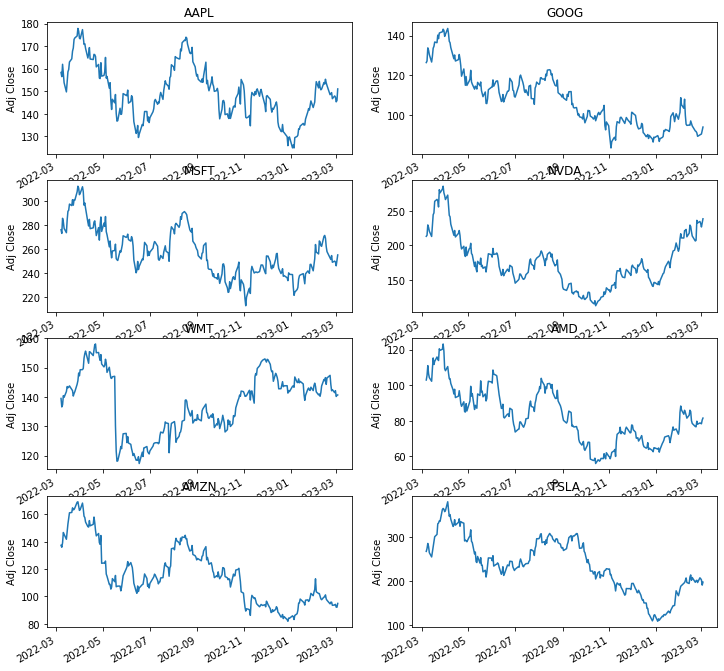

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(4, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f'{tech_list[i - 1]}')

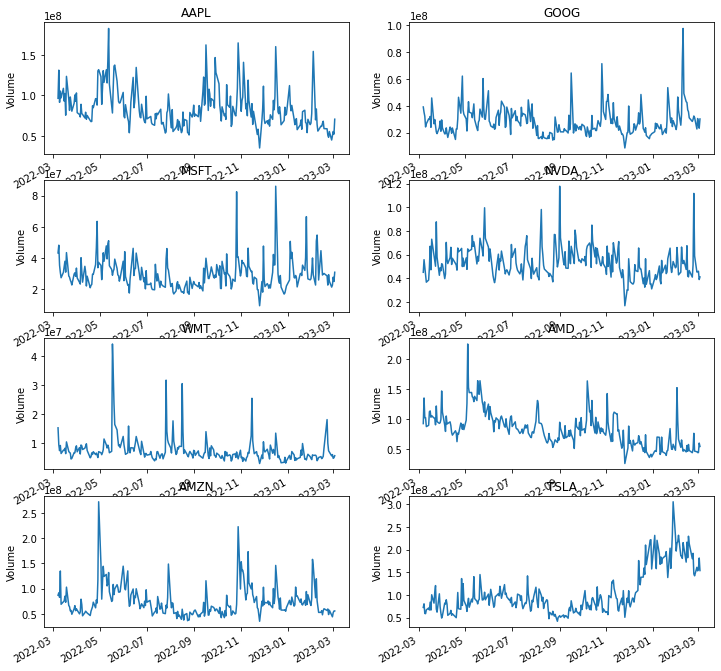

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(4, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f'{tech_list[i - 1]}')

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f'MA for {ma} days'
    company[column_name] = company['Adj Close'].rolling(ma).mean()

print(GOOG.columns)

df.groupby('company_name').hist(figsize=(12, 12));

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
NVDA[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVIDA')
AMD[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('AMD')
WMT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('WALMART')
AMZN[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('AMAZON')
TSLA[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_title('TESLA')

fig.tight_layout()

In [ ]:
# Adj. close column,
# I’ve used pct_change to find the percent change for each day
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')
AMD['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMD')
WMT['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='-', marker='o')
axes[2,1].set_title('WALMART')
TSLA['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('TESLA')
NVDA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='-', marker='o')
axes[3,0].set_title('NVIDA')

AMZN['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('AMAZON')


fig.tight_layout()

In [ ]:
closing_df = DataReader(tech_list,start, end)['Adj Close']
closing_df.head()

In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

In [ ]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

In [ ]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')



In [ ]:
sns.pairplot(tech_rets, kind='reg')



In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [ ]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



In [ ]:
dat = pd.read_csv('/content/8STOCK.csv')

In [ ]:
plt.plot(dat['Risk-Factor (q)'],dat['Daily return(VQE)'])
plt.xlabel('Risk-Factor (q)')
plt.ylabel('Daily return(VQE)')



In [ ]:
plt.plot(dat['Risk-Factor (q)'],dat['Daily return(QAOA)'])
plt.xlabel('Risk-Factor (q)')
plt.ylabel('Daily return(QAOA)')

12 stock

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'NVDA','WMT','AMD','AMZN','TSLA','JPM','JNJ','PYPL','EBAY']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for getting the stock data
for stock in tech_list:
  globals()[stock] = DataReader(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, NVDA, WMT, AMD, AMZN,TSLA,JPM, JNJ,PYPL, EBAY]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'NVIDA','WALMART','AMD','AMAZON','TESLA','JPMORGAN','Johnson & Johnson','PAYPAL','EBAY']

for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.sample(10)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-22   54.980000   56.259998   54.950001   55.750000   54.946514   
2022-11-28  160.259995  163.570007  157.250000  158.270004  158.229523   
2022-11-01   61.490002   61.990002   59.430000   59.660000   59.660000   
2022-05-16  118.540001  119.459999  117.230003  118.260002  115.331696   
2022-07-18   43.980000   44.730000   43.349998   43.590000   43.156246   
2022-08-23  276.440002  278.859985  275.399994  276.440002  274.974396   
2022-04-13  126.940002  129.250000  126.010002  127.300003  124.147850   
2022-07-01   75.190002   75.449997   72.690002   73.669998   73.669998   
2022-09-08   93.599998   96.376999   93.370003   96.169998   96.169998   
2022-10-19  237.039993  239.610001  234.289993  236.479996  235.226257   

              Volume company_name  
Date                               
2022-03-22   7120300         EBAY  
2022-11-28  30374100        NVIDA  
2022-11-01  83806700          AMD  
2022-05-16  10269000     JPMORGAN  
2022-07-18   4544300         EBAY  
2022-08-23  17527400    MICROSOFT  
2022-04-13  30838000     JPMORGAN  
2022-07-01  87734200          AMD  
2022-09-08  10113300       PAYPAL  
2022-10-19  19985700    MICROSOFT

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(8, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f'{tech_list[i - 1]}')

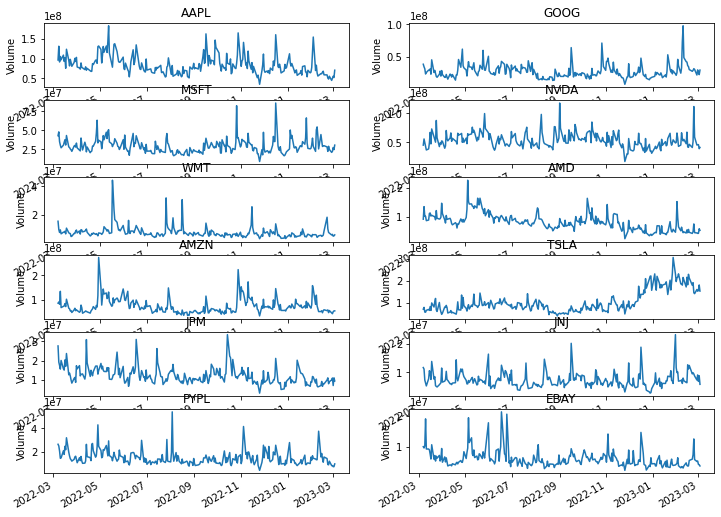

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(8, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f'{tech_list[i - 1]}')

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


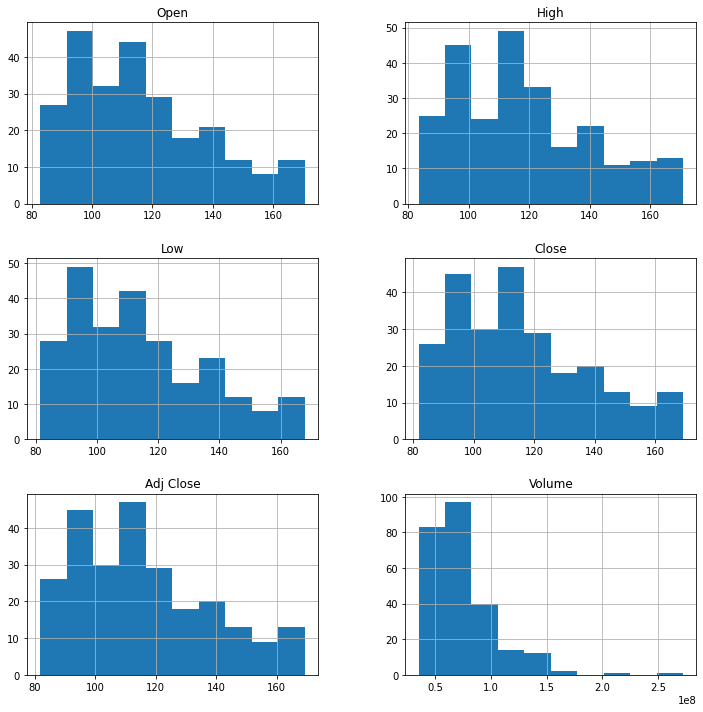

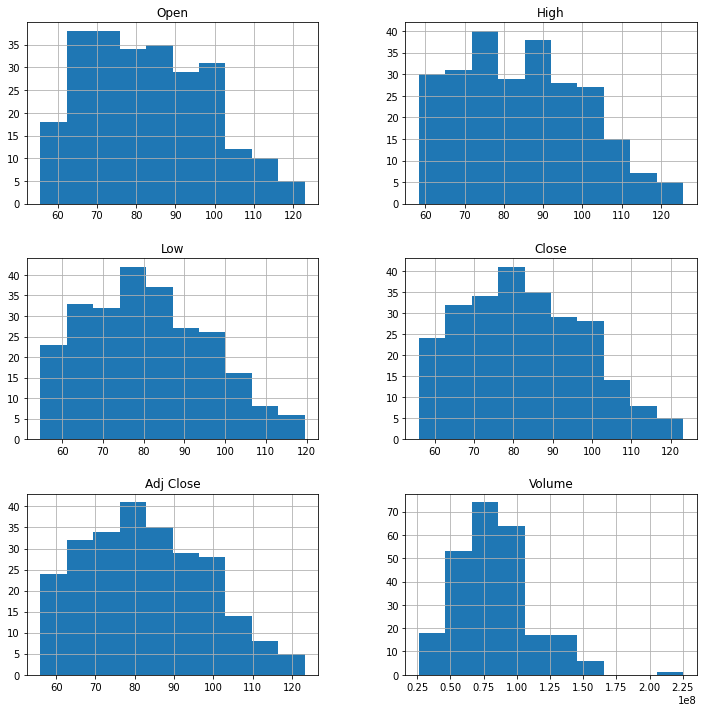

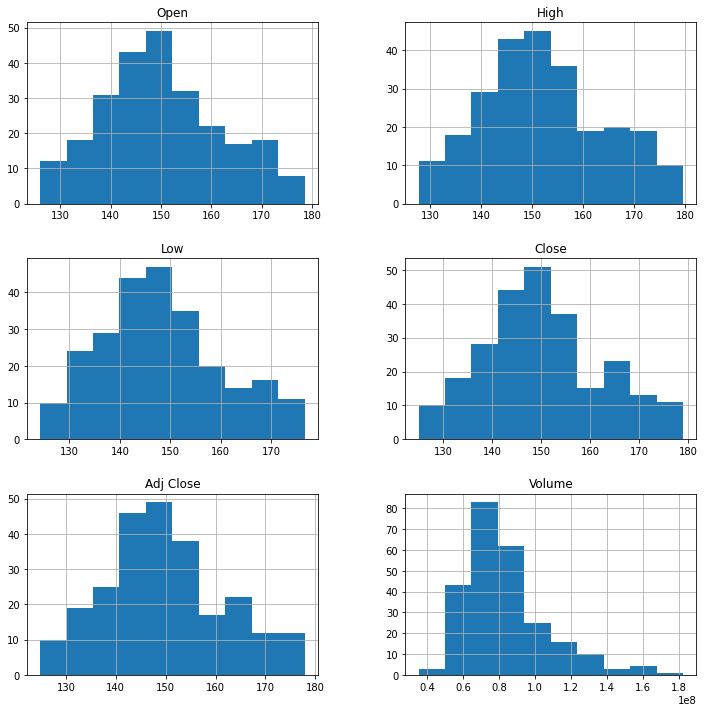

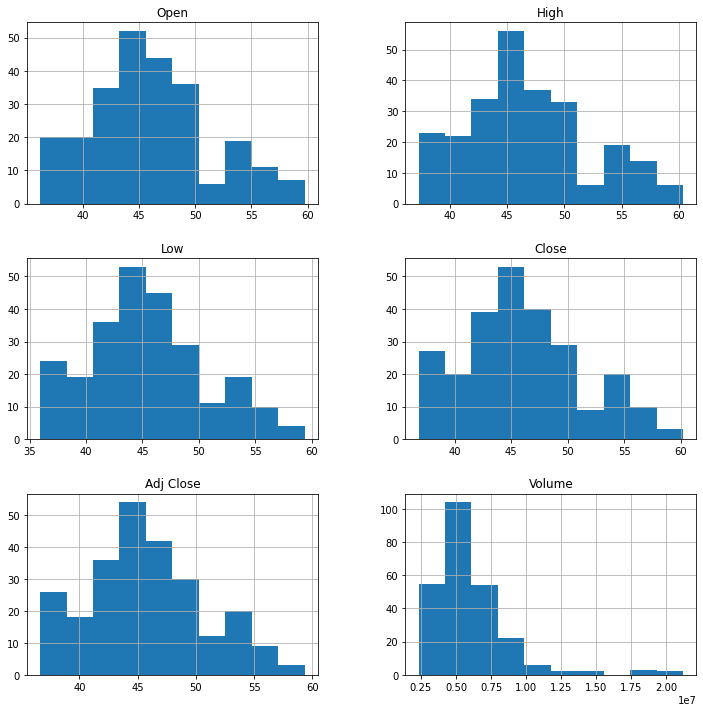

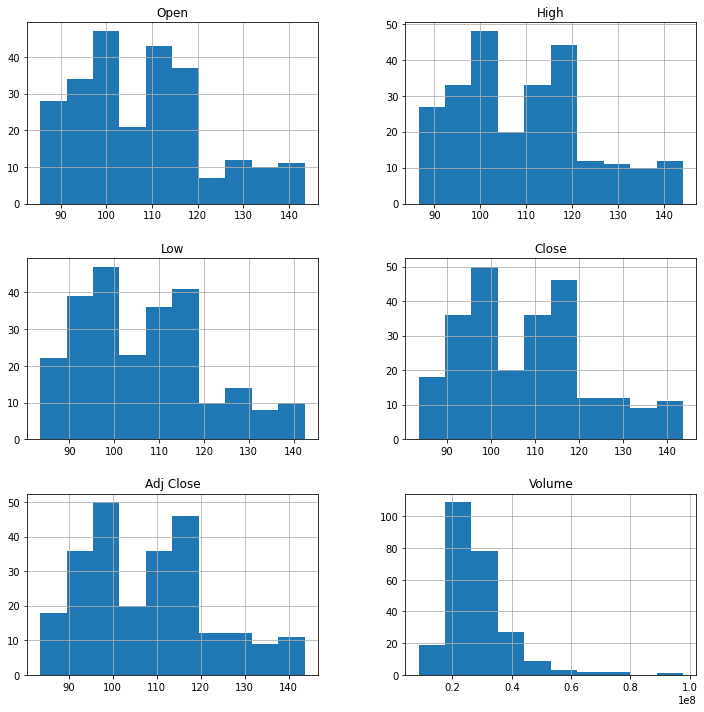

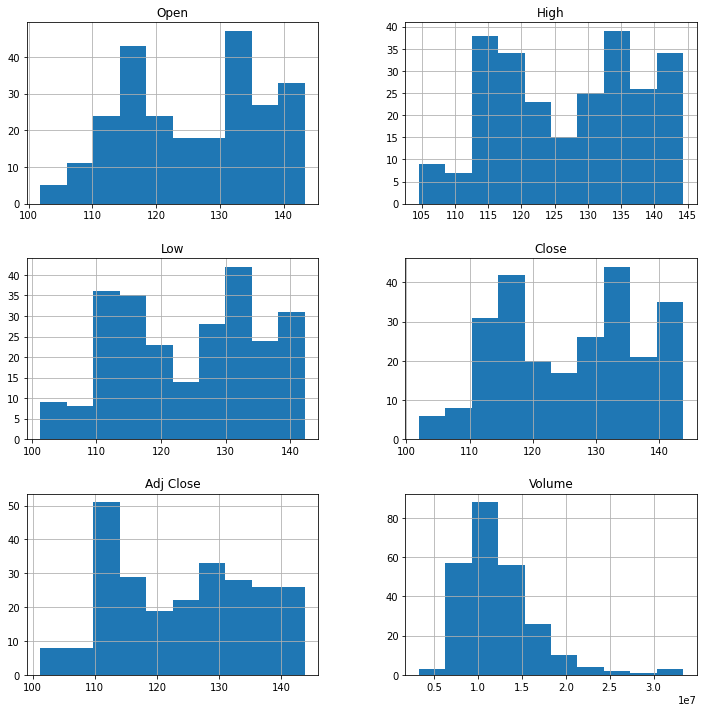

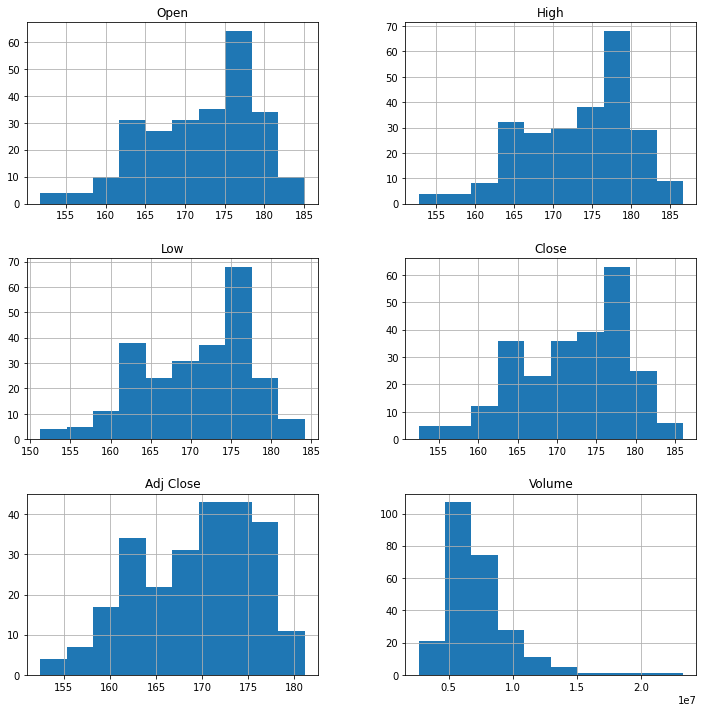

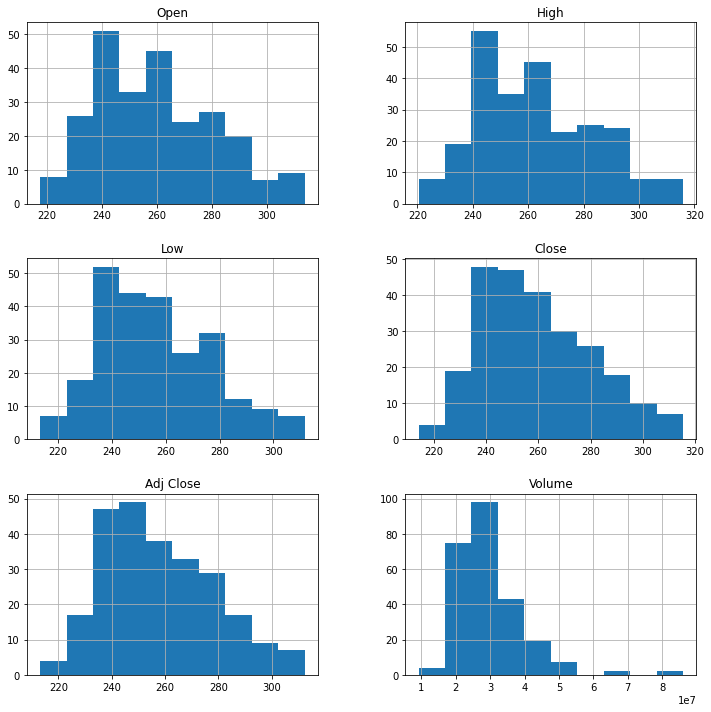

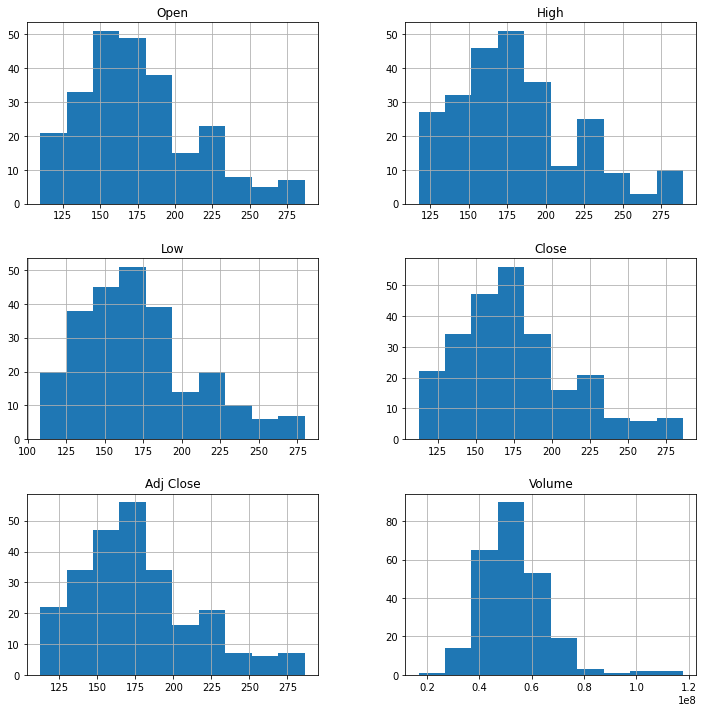

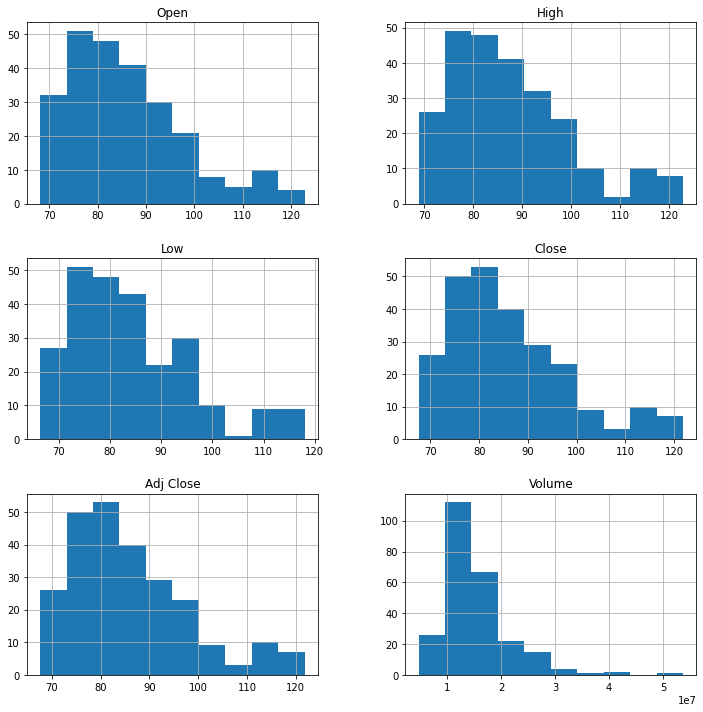

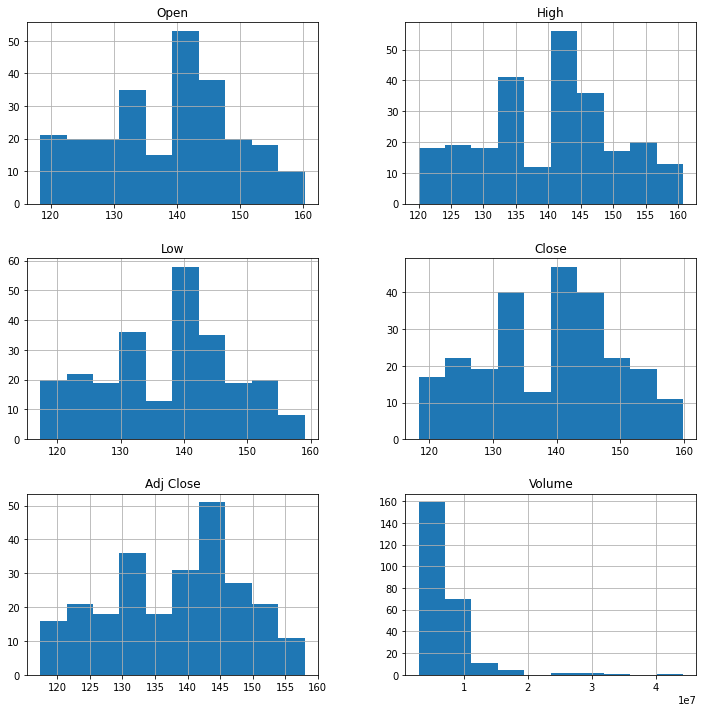

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f'MA for {ma} days'
    company[column_name] = company['Adj Close'].rolling(ma).mean()

print(GOOG.columns)

df.groupby('company_name').hist(figsize=(12, 12));

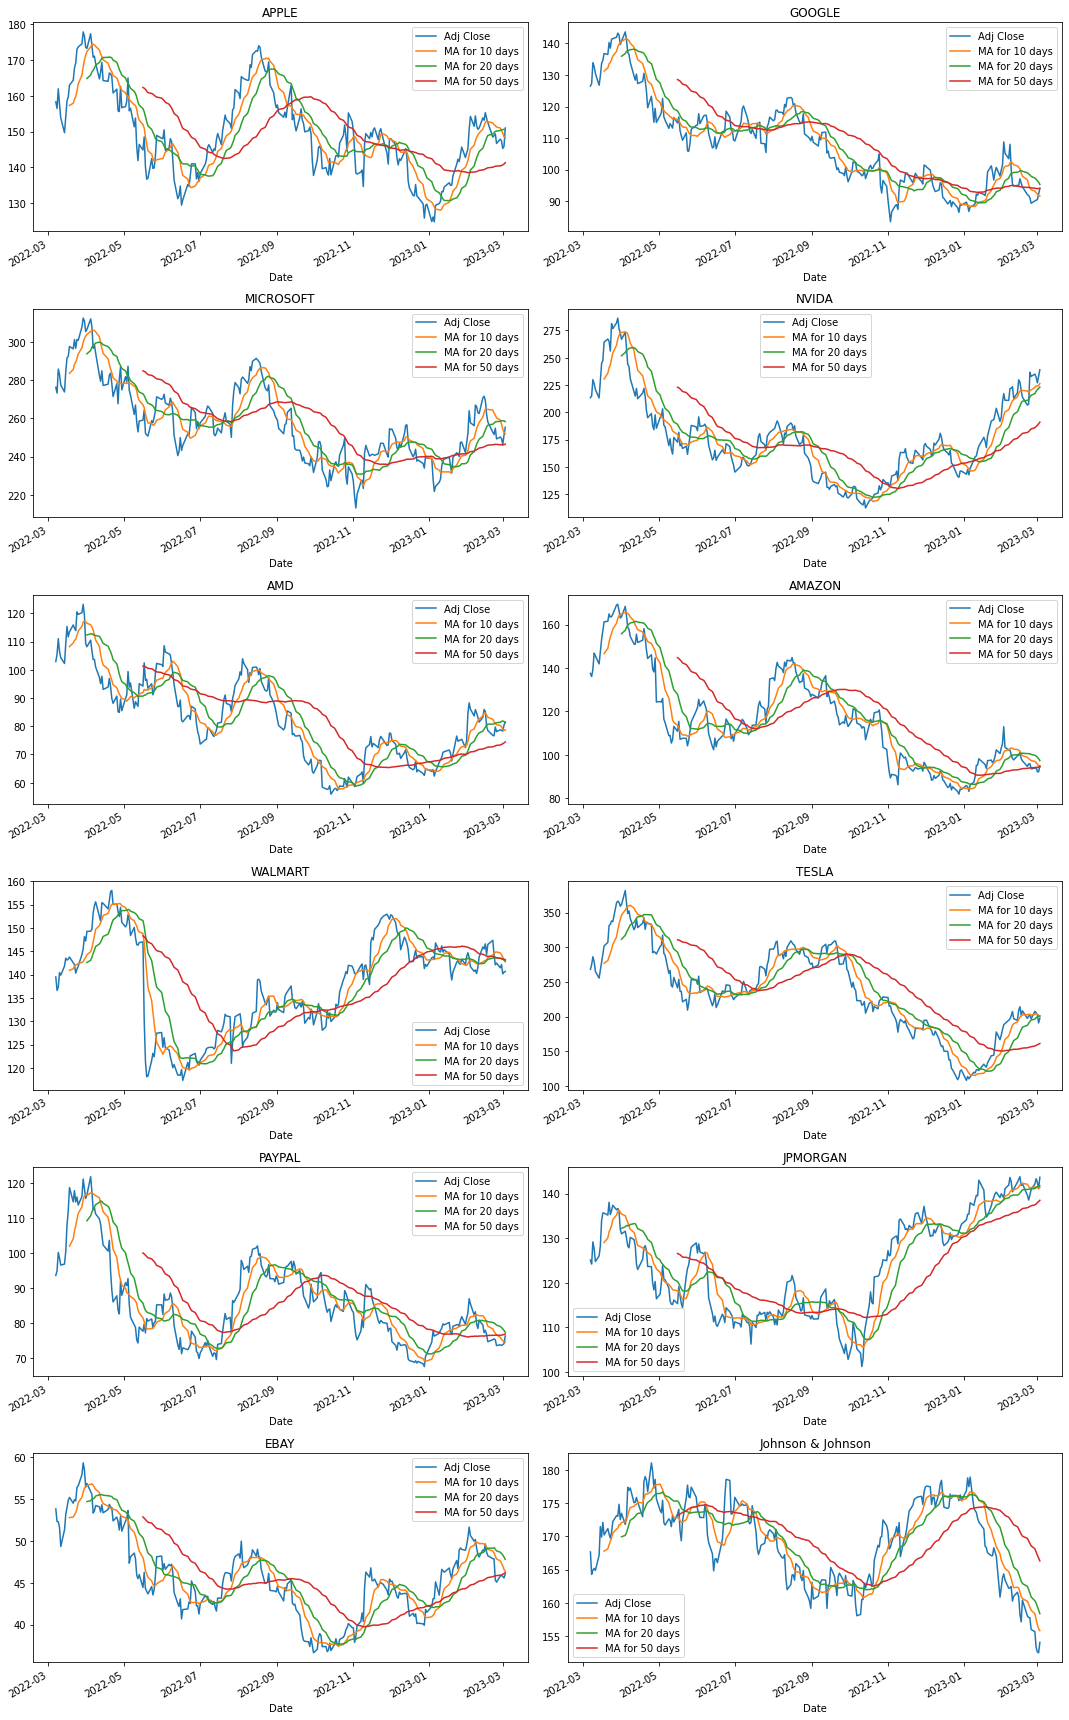

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(24)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
NVDA[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVIDA')
AMD[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('AMD')
WMT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('WALMART')
AMZN[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('AMAZON')
TSLA[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,1])
axes[3,1].set_title('TESLA')
JPM[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[4,1])
axes[4,1].set_title('JPMORGAN')
JNJ[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[5,1])
axes[5,1].set_title('Johnson & Johnson')
PYPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[4,0])
axes[4,0].set_title('PAYPAL')
EBAY[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[5,0])
axes[5,0].set_title('EBAY')

fig.tight_layout()

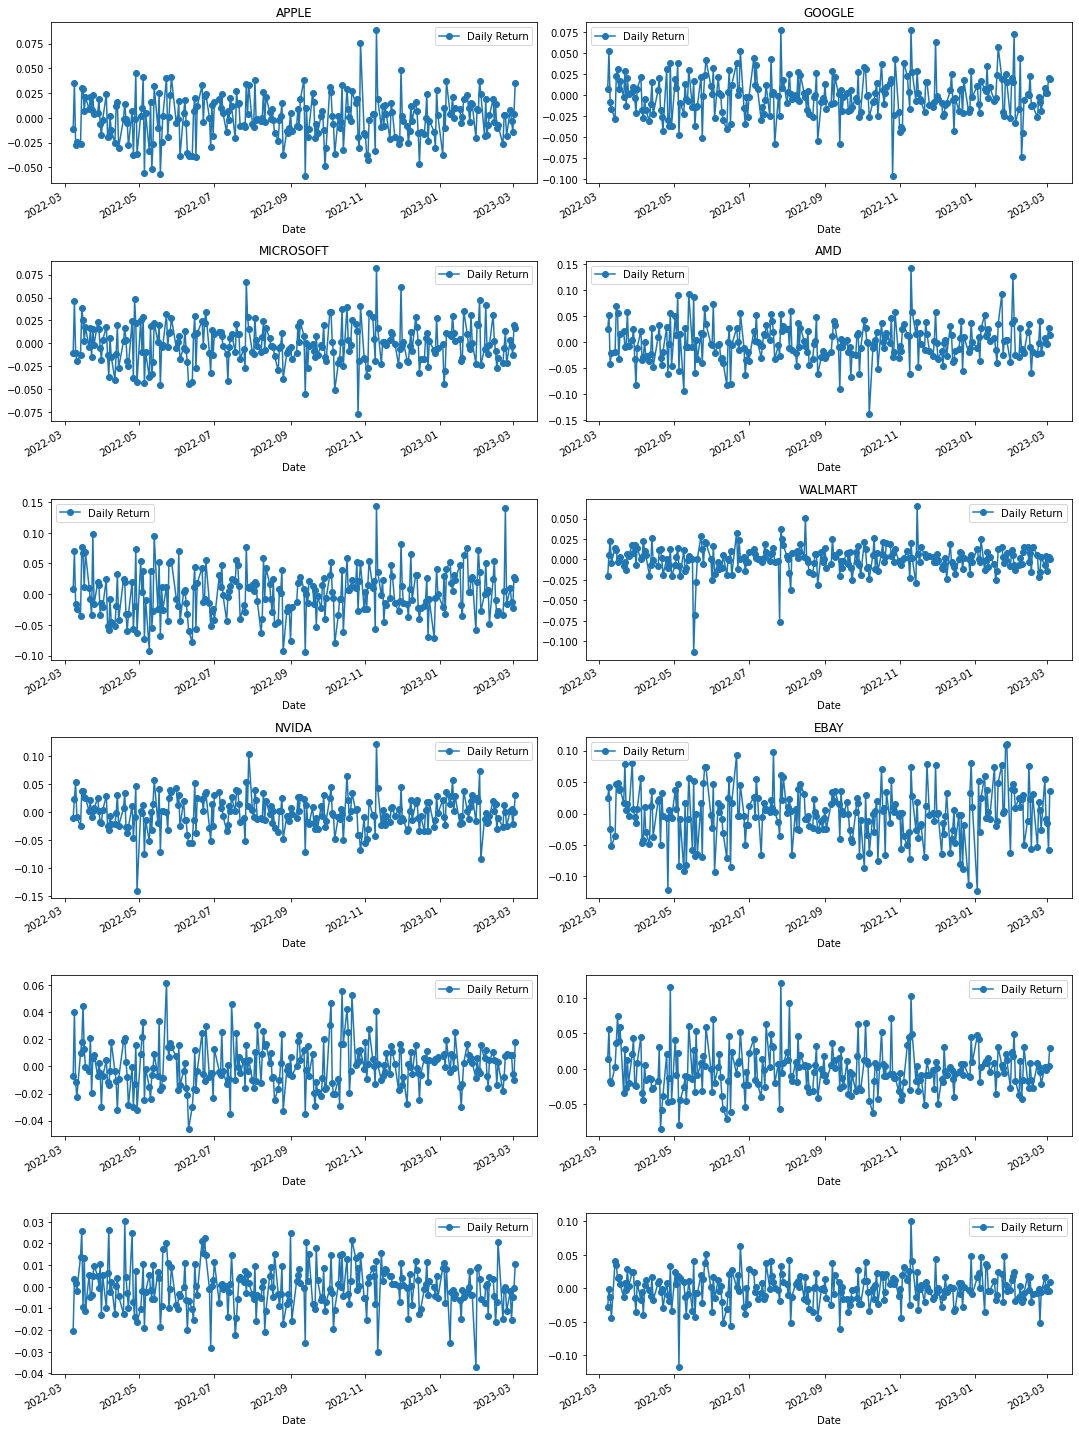

In [ ]:
# Adj. close column,
# I’ve used pct_change to find the percent change for each day
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')
AMD['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMD')
WMT['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='-', marker='o')
axes[2,1].set_title('WALMART')
TSLA['Daily Return'].plot(ax=axes[3,1], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('TESLA')
NVDA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='-', marker='o')
axes[3,0].set_title('NVIDA')

AMZN['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('AMAZON')
JPM['Daily Return'].plot(ax=axes[4,0], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('JPMORGAN')
JNJ['Daily Return'].plot(ax=axes[5,0], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('Johnson & Johnson')
PYPL['Daily Return'].plot(ax=axes[4,1], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('PAYPAL')
EBAY['Daily Return'].plot(ax=axes[5,1], legend=True, linestyle='-', marker='o')
axes[3,1].set_title('EBAY')


fig.tight_layout()

In [ ]:
closing_df = DataReader(tech_list,start, end)['Adj Close']
closing_df.head()

[*********************100%***********************]  12 of 12 completed


AAPL         AMD        AMZN       EBAY        GOOG  \
Date                                                                    
2022-03-07  158.340820  102.949997  137.453003  53.836391  126.464500   
2022-03-08  156.492004  105.529999  136.014496  52.324852  127.278503   
2022-03-09  161.968826  111.050003  139.279007  52.295284  133.865997   
2022-03-10  157.565521  106.459999  146.817505  51.605370  132.682007   
2022-03-11  153.798325  104.290001  145.524506  49.338520  130.475494   

                   JNJ         JPM        MSFT        NVDA        PYPL  \
Date                                                                     
2022-03-07  167.672440  125.083389  276.200378  213.356873   93.610001   
2022-03-08  164.274399  124.202454  273.170135  214.975632   94.900002   
2022-03-09  164.897507  129.178299  285.697205  229.964157  100.220001   
2022-03-10  165.189636  127.648758  282.815491  226.406891   98.550003   
2022-03-11  164.887817  124.773613  277.349091  220.831161   96.570000   

                  TSLA         WMT  
Date                                
2022-03-07  268.193329  139.477493  
2022-03-08  274.799988  136.592850  
2022-03-09  286.323334  137.301727  
2022-03-10  279.433319  140.422668  
2022-03-11  265.116669  139.871307

In [ ]:
tech_rets = closing_df.pct_change()
tech_rets.head()

AAPL       AMD      AMZN      EBAY      GOOG       JNJ  \
Date                                                                     
2022-03-07       NaN       NaN       NaN       NaN       NaN       NaN   
2022-03-08 -0.011676  0.025061 -0.010465 -0.028077  0.006437 -0.020266   
2022-03-09  0.034997  0.052307  0.024001 -0.000565  0.051757  0.003793   
2022-03-10 -0.027186 -0.041333  0.054125 -0.013193 -0.008845  0.001772   
2022-03-11 -0.023909 -0.020383 -0.008807 -0.043927 -0.016630 -0.001827   

                 JPM      MSFT      NVDA      PYPL      TSLA       WMT  
Date                                                                    
2022-03-07       NaN       NaN       NaN       NaN       NaN       NaN  
2022-03-08 -0.007043 -0.010971  0.007587  0.013781  0.024634 -0.020682  
2022-03-09  0.040062  0.045858  0.069722  0.056059  0.041934  0.005190  
2022-03-10 -0.011841 -0.010087 -0.015469 -0.016663 -0.024064  0.022731  
2022-03-11 -0.022524 -0.019329 -0.024627 -0.020091 -0.051235 -0.003926

In [ ]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


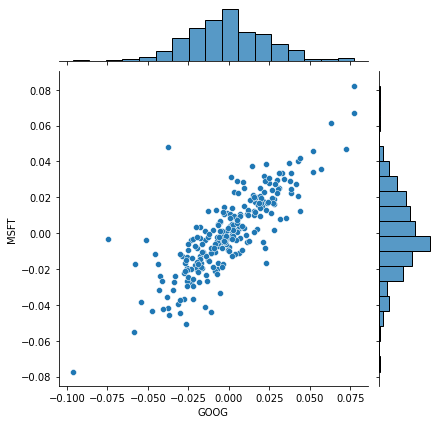

In [ ]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')



In [ ]:
sns.pairplot(tech_rets, kind='reg')



In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

<AxesSubplot:>

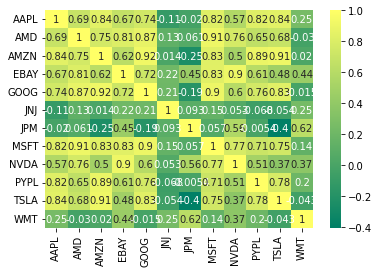

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

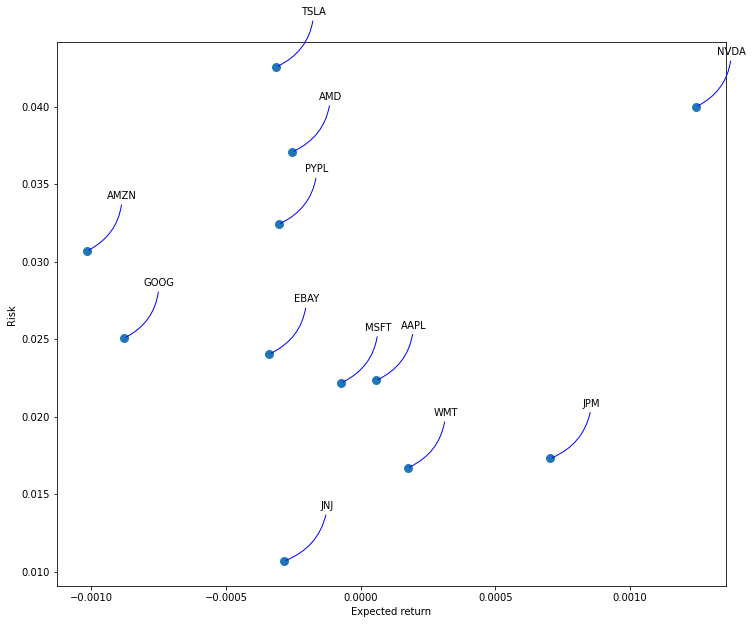

In [ ]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



In [ ]:
dat = pd.read_csv("/content/12STOCK.csv")

In [ ]:
plt.plot(dat['Risk-Factor (q)'],dat['Daily return(VQE)'])
plt.xlabel('Risk-Factor (q)')
plt.ylabel('Daily return(VQE)')

Text(0, 0.5, 'Daily return(VQE)')

Text(0, 0.5, 'Daily return(QAOA)')

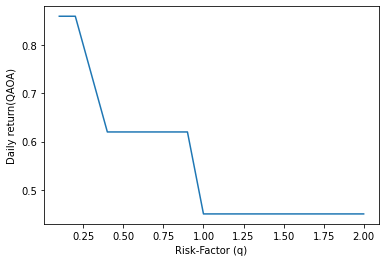

In [ ]:
plt.plot(dat['Risk-Factor (q)'],dat['Daily return(QAOA)'])
plt.xlabel('Risk-Factor (q)')
plt.ylabel('Daily return(QAOA)')